In [1]:
import pandas as pd

In [24]:
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv("data_efa.csv")

In [27]:
df

,cinsiyet,yasaraligi,egitim,pozisyon,calismayili,isletmekusak,yönetimanlayisi,iletisim1,orgutyapisi1,orgutyapisi2,...,profesyonellik2,profesyonellik3,Profesyonellik 4,yetki1,yetki2,denetim1,denetim2,denetim3,denetim4,denetim5
0,2,4,5,1,3,1,2,2,4,2,...,4,4,5,4,4,3,4,4,2,4
1,2,8,5,8,3,1,3,4,5,5,...,3,4,2,4,4,4,4,4,2,5
2,2,5,5,2,2,1,5,1,2,1,...,1,1,5,1,1,2,2,2,1,2
3,2,6,5,7,3,3,2,4,4,4,...,4,3,4,5,5,5,4,3,4,5
4,2,4,5,4,2,1,4,3,3,3,...,2,3,2,3,4,3,4,4,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,2,7,3,4,7,2,2,5,5,5,...,5,1,4,5,5,4,4,4,3,5
189,2,6,5,1,7,1,4,2,2,2,...,4,5,3,3,1,2,3,5,1,3
190,2,5,3,1,3,1,3,5,4,5,...,5,3,5,5,3,5,5,5,3,5
191,2,5,5,2,3,1,5,4,4,3,...,3,3,3,3,4,4,4,3,4,4


In [28]:
df.drop(['cinsiyet','yasaraligi', 'egitim','pozisyon','calismayili','isletmekusak'],axis=1,inplace=True)

In [29]:
df

,yönetimanlayisi,iletisim1,orgutyapisi1,orgutyapisi2,orgutyapisi3,orgutyapisi4,orgutyapisi5,profesyonellik1,profesyonellik2,profesyonellik3,Profesyonellik 4,yetki1,yetki2,denetim1,denetim2,denetim3,denetim4,denetim5
0,2,2,4,2,5,5,5,4,4,4,5,4,4,3,4,4,2,4
1,3,4,5,5,4,4,5,3,3,4,2,4,4,4,4,4,2,5
2,5,1,2,1,1,1,3,1,1,1,5,1,1,2,2,2,1,2
3,2,4,4,4,4,3,4,2,4,3,4,5,5,5,4,3,4,5
4,4,3,3,3,3,3,4,3,2,3,2,3,4,3,4,4,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,2,5,5,5,5,5,5,3,5,1,4,5,5,4,4,4,3,5
189,4,2,2,2,1,1,3,2,4,5,3,3,1,2,3,5,1,3
190,3,5,4,5,5,5,5,4,5,3,5,5,3,5,5,5,3,5
191,5,4,4,3,4,2,4,3,3,3,3,3,4,4,4,3,4,4


In [30]:
df.dropna(inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 192
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   yönetimanlayisi   193 non-null    int64
 1   iletisim1         193 non-null    int64
 2   orgutyapisi1      193 non-null    int64
 3   orgutyapisi2      193 non-null    int64
 4   orgutyapisi3      193 non-null    int64
 5   orgutyapisi4      193 non-null    int64
 6   orgutyapisi5      193 non-null    int64
 7   profesyonellik1   193 non-null    int64
 8   profesyonellik2   193 non-null    int64
 9   profesyonellik3   193 non-null    int64
 10  Profesyonellik 4  193 non-null    int64
 11  yetki1            193 non-null    int64
 12  yetki2            193 non-null    int64
 13  denetim1          193 non-null    int64
 14  denetim2          193 non-null    int64
 15  denetim3          193 non-null    int64
 16  denetim4          193 non-null    int64
 17  denetim5          193 non-null    i

In [32]:
df.head()

,yönetimanlayisi,iletisim1,orgutyapisi1,orgutyapisi2,orgutyapisi3,orgutyapisi4,orgutyapisi5,profesyonellik1,profesyonellik2,profesyonellik3,Profesyonellik 4,yetki1,yetki2,denetim1,denetim2,denetim3,denetim4,denetim5
0,2,2,4,2,5,5,5,4,4,4,5,4,4,3,4,4,2,4
1,3,4,5,5,4,4,5,3,3,4,2,4,4,4,4,4,2,5
2,5,1,2,1,1,1,3,1,1,1,5,1,1,2,2,2,1,2
3,2,4,4,4,4,3,4,2,4,3,4,5,5,5,4,3,4,5
4,4,3,3,3,3,3,4,3,2,3,2,3,4,3,4,4,2,3


#Adequacy Test

Before you perform factor analysis, you need to evaluate the “factorability” of our dataset. Factorability means "can we found the factors in the dataset?". There are two methods to check the factorability or sampling adequacy:
Bartlett’s Test
    Kaiser-Meyer-Olkin Test
    Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all using the observed correlation matrix against the identity matrix. If the test found statistically insignificant, you should not employ a factor analysis.

In [46]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
print((round(chi_square_value,None), round(p_value,None)))

(1456, 0)


In this Bartlett ’s test, the p-value is 0. The test was statistically significant, indicating that the observed correlation matrix is not an identity matrix.

Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. It determines the adequacy for each observed variable and for the complete model. KMO estimates the proportion of variance among all the observed variable. Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. Value of KMO less than 0.6 is considered inadequate.


In [47]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(df)

In [48]:
kmo_model

0.8511180227872862

The overall KMO for our data is 0.85, which is excellent. This value indicates that you can proceed with your planned factor analysis.

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 192
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   yönetimanlayisi   193 non-null    int64
 1   iletisim1         193 non-null    int64
 2   orgutyapisi1      193 non-null    int64
 3   orgutyapisi2      193 non-null    int64
 4   orgutyapisi3      193 non-null    int64
 5   orgutyapisi4      193 non-null    int64
 6   orgutyapisi5      193 non-null    int64
 7   profesyonellik1   193 non-null    int64
 8   profesyonellik2   193 non-null    int64
 9   profesyonellik3   193 non-null    int64
 10  Profesyonellik 4  193 non-null    int64
 11  yetki1            193 non-null    int64
 12  yetki2            193 non-null    int64
 13  denetim1          193 non-null    int64
 14  denetim2          193 non-null    int64
 15  denetim3          193 non-null    int64
 16  denetim4          193 non-null    int64
 17  denetim5          193 non-null    i

In [66]:
fa = FactorAnalyzer(18, rotation="varimax")
fa.fit(df)
fa.loadings_
ev, v = fa.get_eigenvalues()
ev

array([6.45111848, 1.43532773, 1.29014865, 1.1636872 , 1.13292152,
       0.909978  , 0.81572196, 0.77307327, 0.62222918, 0.60532309,
       0.53354971, 0.50426572, 0.44390692, 0.39222225, 0.30275576,
       0.23739791, 0.21266934, 0.1737033 ])

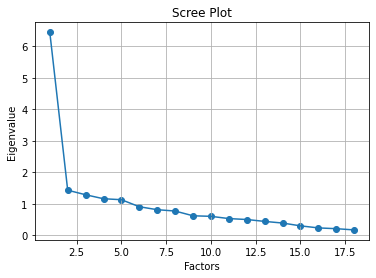

In [67]:
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [82]:
fa_1 = FactorAnalyzer(5, rotation="varimax")
fa_1.fit(df)

FactorAnalyzer(n_factors=5, rotation='varimax', rotation_kwargs={})

In [83]:
fa_1.loadings_

array([[-0.08715612,  0.00076917, -0.02127592, -0.43946876, -0.09425799],
       [ 0.49458846,  0.36081168,  0.27777283,  0.08404885,  0.07411627],
       [ 0.42490219,  0.37367676,  0.16795095,  0.15492366, -0.02090526],
       [ 0.73129401,  0.17664615,  0.15845688,  0.02694815,  0.08735393],
       [ 0.60347123,  0.18527698,  0.14916255,  0.43485745,  0.24313767],
       [ 0.62627345,  0.24706141,  0.12894906,  0.51937843,  0.11444781],
       [ 0.34624218,  0.51462186,  0.21426834,  0.41142763, -0.06760151],
       [ 0.05946643,  0.18768145,  0.27497555,  0.65097479,  0.05595513],
       [ 0.53268341,  0.1177069 ,  0.19008847,  0.0862303 ,  0.15617828],
       [ 0.16985577,  0.04322926,  0.34112115,  0.02075241,  0.28618944],
       [-0.01817355,  0.00106299,  0.11809976, -0.07804024, -0.28913172],
       [ 0.17927569,  0.15007302,  0.75950225,  0.26196857, -0.07845234],
       [ 0.34863969,  0.26242692,  0.7654684 ,  0.18030032, -0.06085245],
       [ 0.19517361,  0.71947921,  0.1

In [84]:
factor_variance = fa_1.get_factor_variance()

In [85]:
for line in fa_1.loadings_:
    print(*line)

-0.08715611994901555 0.0007691718503808895 -0.021275918482520886 -0.43946876153824027 -0.09425798758131343
0.494588461338553 0.36081167752340126 0.2777728259877108 0.08404884727877299 0.07411626988066777
0.4249021862275286 0.3736767555162345 0.16795094605875047 0.15492366159797433 -0.02090526167947337
0.7312940111153091 0.17664614831801662 0.15845687628061386 0.02694814823804544 0.08735392956293363
0.6034712257812779 0.1852769793173565 0.1491625530852203 0.43485744977771057 0.24313767343516587
0.6262734541862055 0.2470614122919407 0.12894906131894618 0.5193784310620941 0.11444780837936734
0.3462421760700534 0.5146218582611087 0.21426833585667635 0.41142762940260685 -0.06760151267203277
0.05946643410184619 0.1876814504957876 0.2749755450748996 0.6509747926839983 0.0559551305768784
0.532683412159616 0.11770689627326081 0.19008846960944034 0.0862303028497314 0.15617827678169074
0.16985576863468965 0.043229261019347924 0.34112115348152466 0.02075240856231729 0.2861894390553512
-0.018173548

In [86]:
for line in factor_variance:
    print(*line)

2.516261929974623 2.3085816041881393 1.8900390509458052 1.4345448727215788 0.8798255550378274
0.13979232944303463 0.12825453356600774 0.10500216949698918 0.07969693737342104 0.048879197502101526
0.13979232944303463 0.26804686300904235 0.3730490325060315 0.45274596987945254 0.501625167381554
